## <font style = "color:rgb(139,0,0)">UNSUPERVISED LEARNING PROJECT</font>

### <font style = "color:rgb(139,0,0)">Data Description</font>

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### <font style = "color:rgb(139,0,0)">Domain</font>

Object recognition

### <font style = "color:rgb(139,0,0)">Context</font>

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### <font style = "color:rgb(139,0,0)">Attribute Information</font>
- All the features are geometric features extracted from the silhouette.
- All are numeric in nature.

### <font style = "color:rgb(139,0,0)">Learning Outcomes</font>
- Exploratory Data Analysis
- Reduce number dimensions in the dataset with minimal information loss
- Train a model using Principle Components

### <font style = "color:rgb(139,0,0)">Objective</font>
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

## <font style = "color:rgb(184,134,11)">Step A :- Data preprocessing</font>

In [1]:
# importing modules
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data
vehicle = pd.read_csv("ULvehicle.csv")

In [3]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
# Determining shape of the data
print("Data has {} samples and {} features".format(vehicle.shape[0],vehicle.shape[1]))

Data has 846 samples and 19 features


In [5]:
# Detemining data types
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

We can see here that only one column - **`class`** has the data type **`object`** but since it's a categorical column, so we'll map it to integers.

In [6]:
# Describing data
vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


## To represent data in Box plots and remove the outliers.

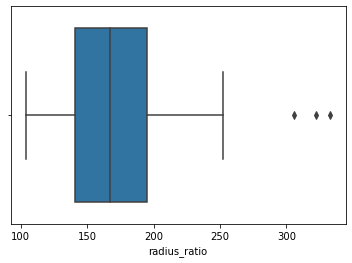

In [7]:
sns.boxplot(vehicle["radius_ratio"])
plt.show()

In [8]:
vehicle = vehicle[vehicle["radius_ratio"] <= 300]

In [9]:
vehicle.shape

(837, 19)

We removed 9 samples from the above step.

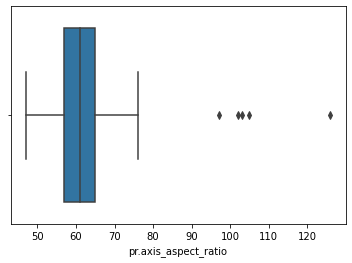

In [10]:
sns.boxplot(vehicle["pr.axis_aspect_ratio"])
plt.show()

In [11]:
vehicle = vehicle[vehicle["pr.axis_aspect_ratio"] <= 90]

In [12]:
vehicle.shape

(830, 19)

We removed 7 samples from the above step.

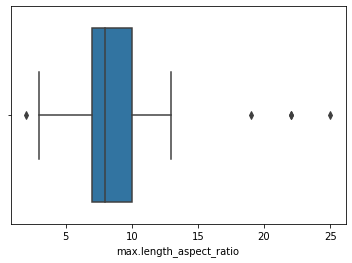

In [13]:
sns.boxplot(vehicle["max.length_aspect_ratio"])
plt.show()

In this case, the minimum value is very close to Q1, so we need not remove it.

In [14]:
vehicle = vehicle[vehicle["max.length_aspect_ratio"] <= 15]

In [15]:
vehicle.shape

(826, 19)

We removed 4 samples from the above step.

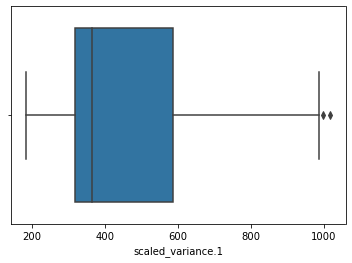

In [16]:
sns.boxplot(vehicle["scaled_variance.1"])
plt.show()

There is no need to remove the maximum value in this case.

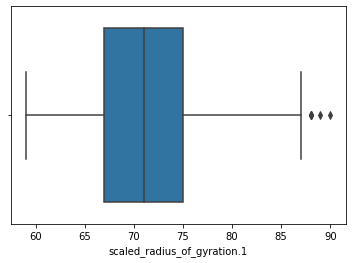

In [17]:
sns.boxplot(vehicle["scaled_radius_of_gyration.1"])
plt.show()

There is no need of removing the outliers in the above case.

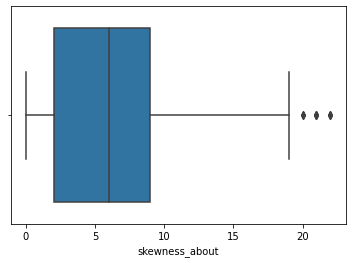

In [18]:
sns.boxplot(vehicle["skewness_about"])
plt.show()

Also in the above case it is not needed to remove outliers as they are very close to maximum values.

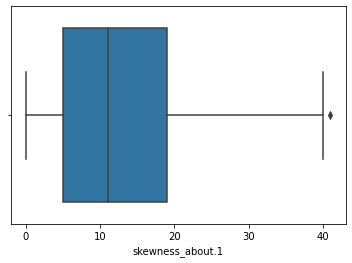

In [19]:
sns.boxplot(vehicle["skewness_about.1"])
plt.show()

No need to remove outliers here also.

In [20]:
vehicle.shape

(826, 19)

We removed a total of 20 samples in our data.

In [21]:
# to calculate data% removed.
20/846 * 100

2.3640661938534278

From above we can see that we have removed aproximately 2.36% of the data.

In [22]:
# Calculating Missing values in percentage.
vehicle.isna().sum()/len(vehicle.index) * 100

compactness                    0.000000
circularity                    0.605327
distance_circularity           0.484262
radius_ratio                   0.000000
pr.axis_aspect_ratio           0.000000
max.length_aspect_ratio        0.000000
scatter_ratio                  0.121065
elongatedness                  0.121065
pr.axis_rectangularity         0.363196
max.length_rectangularity      0.000000
scaled_variance                0.363196
scaled_variance.1              0.242131
scaled_radius_of_gyration      0.242131
scaled_radius_of_gyration.1    0.484262
skewness_about                 0.605327
skewness_about.1               0.121065
skewness_about.2               0.121065
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [23]:
# Columns with missing values
missingCols = vehicle.columns[vehicle.isna().sum()/len(vehicle.index) * 100 != 0]

In [24]:
print("Number of columns with missing values: {}".format(len(missingCols)))

Number of columns with missing values: 12


As we have just **826 samples**, we cannot afford to remove any samples at this stage. So we can fill the missing values with the median.

In [25]:
medianFiller = lambda x: x.fillna(x.median())
for col in missingCols:
    vehicle[col].fillna(vehicle[col].median(),inplace=True)

In [26]:
# Missing values in percentage
vehicle.isna().sum()/len(vehicle.index) * 100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

 We can see that there are no missing values now.
So let's finally map the target column - **`class`** to integers as follows.

In [27]:
vehicle["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In [28]:
vehicle["class"] = vehicle["class"].map({"van":0,"car":1,"bus":2})

In [29]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,0
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,2


We are also going to standardize the data as the final step.

In [30]:
cols = vehicle.columns

In [31]:
cols = cols.drop('class')

In [32]:
vehicle[cols] = (vehicle[cols]-vehicle[cols].mean())/(vehicle[cols].std())

In [33]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.152122,0.521408,0.056586,0.316509,1.925877,0.904893,-0.208134,0.135427,-0.225356,0.761743,-0.386459,-0.342532,0.292555,-0.323349,-0.075383,0.370941,-0.318642,0.175410,0
1,-0.332089,-0.614531,0.119833,-0.839874,-0.733095,0.425764,-0.598312,0.517644,-0.610747,-0.334901,-0.580707,-0.619416,-0.504667,-0.009130,0.535071,0.148269,0.005294,0.443226,0
2,1.241596,0.845963,1.511276,1.285370,0.862288,0.904893,1.142484,-1.138632,0.930818,0.693203,1.135154,1.104051,1.396400,0.147980,1.552495,-0.408412,-0.156674,0.041502,1
3,-0.089983,-0.614531,-0.006662,-0.277309,0.330494,0.425764,-0.748381,0.645050,-0.610747,-0.334901,-0.904455,-0.738081,-1.455200,-1.423117,-0.075383,-0.297076,1.624976,1.514492,0
5,1.604754,-0.127700,1.511276,0.128987,-1.973949,-1.011624,2.583143,-1.903067,2.857774,1.447146,2.980514,2.923580,2.745544,2.033296,-0.278868,-0.408412,-1.290451,-1.699305,2


The data has now become ready for Exploratory Data Analysis.

## <font style = "color:rgb(184,134,11)">Step B :- Understanding the Attributes.</font>

First of all we analyse the correlation between features.

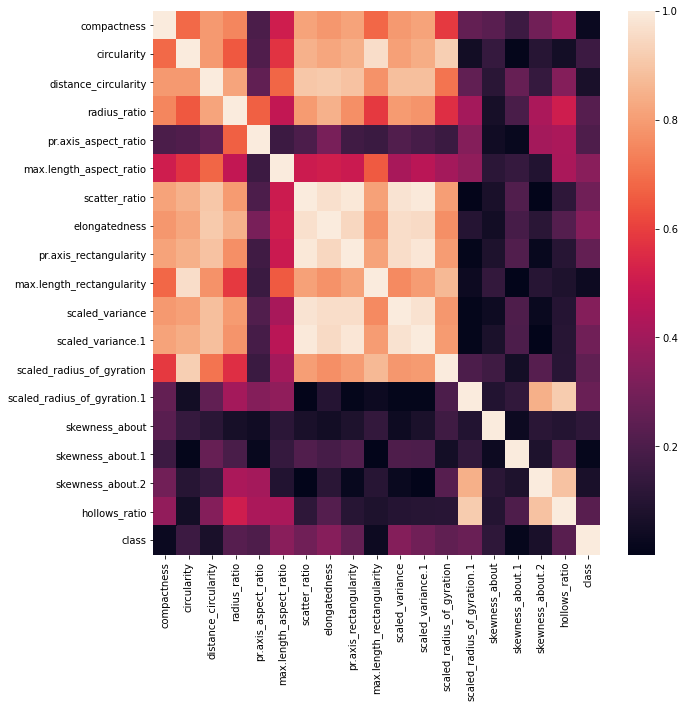

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(vehicle.corr().abs())
plt.show()

Attribute **`class`** doesn't have a strong correlation with any of the columns but the following columns given below are highly correlated with each other and thus, one of them can be removed:

1. **`scaled_radius_of_gyration.1`** and **`hollows_ratio`**
2. **`scaled_radius_of_gyration.1`** and **`skewness_about.2`**
3. **`skewness_about.2`** and **`hollows_ratio`**

The following columns are strongly correlated with a lot of columns and can also be removed:
1. **`compactness`**
2. **`circularity`**
3. **`distance_circularity`**
4. **`radius_ratio`**
5. **`scatter_ratio`**
6. **`elongatedness`**
7. **`pr.axis_rectangularity`**
8. **`max.length_rectangularity`**
9. **`scaled_variance`**
10. **`scaled_variance.1`**
11. **`scaled_radius_of_gyration`**

So let's remove all the above 11 columns and **`scaled_radius_of_gyration.1`** and **`skewness_about.2`**.

In [35]:
colsToRemove = ["scaled_radius_of_gyration.1",
               "skewness_about.2",
               "compactness",
                "circularity",
                "distance_circularity",
                "radius_ratio",
                "scatter_ratio",
                "elongatedness",
                "pr.axis_rectangularity",
                "max.length_rectangularity",
                "scaled_variance",
                "scaled_variance.1",
                "scaled_radius_of_gyration"]

In [36]:
vehicle_EDA = vehicle.drop(colsToRemove,axis=1)

In [37]:
vehicle_EDA.shape

(826, 6)

So, we have to now work with only 6 columns and 826 samples.

## <font style = "color:rgb(184,134,11)">Step C :- Splitting the data.</font>

In [38]:
# Necessary import
from sklearn.model_selection import train_test_split

In [39]:
# specifying the random state to allow reproducibility.
random_state = 42

In [40]:
X = vehicle_EDA.drop("class",axis=1)

In [41]:
y = vehicle_EDA["class"]

Let's see for 70:30 split.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=random_state)

In [43]:
X_train.shape

(578, 5)

In [44]:
X_test.shape

(248, 5)

## <font style = "color:rgb(184,134,11)">Step D :- Training a SVM model.</font>

In [45]:
# Necessary import
from sklearn.svm import SVC

In [46]:
model = SVC(kernel="rbf")

In [47]:
model.fit(X_train,y_train)

SVC()

In [48]:
model.score(X_test,y_test)

0.7096774193548387

With the default parameter values, the SVM model gives an accuracy of 70.97%.

So now let's try using **`GridSearchCV`** for hyperparameter tuning.

In [49]:
param_grid = {"C":[1,10,100,1000],
             "gamma":[0.01,0.1,1,10,100],
             "kernel":["rbf","linear"]}

In [50]:
# Necessary import.
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, cv=2, n_jobs=2, return_train_score=True)

In [52]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=2, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, verbose=3)

In [53]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
model = SVC(C=10,gamma=0.1,kernel="rbf")

In [55]:
model.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [56]:
pred = model.predict(X_test)

In [57]:
# Necessary imports.
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.34      0.39        53
           1       0.76      0.83      0.79       130
           2       0.79      0.80      0.79        65

    accuracy                           0.72       248
   macro avg       0.67      0.66      0.66       248
weighted avg       0.70      0.72      0.71       248



In [59]:
model.score(X_test,y_test)

0.717741935483871

We obtained an accuracy of 71.77% on the dataset.

## <font style = "color:rgb(184,134,11)">Step E :- Applying K-fold CV.</font>


In [60]:
# Necessary import.
from sklearn.model_selection import cross_val_score

In [61]:
model = SVC(kernel="rbf",C=10,gamma=0.1)

In [62]:
scores = cross_val_score(model,X,y,cv=5)

In [63]:
scores

array([0.75903614, 0.73939394, 0.75757576, 0.75151515, 0.76363636])

In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.02)


The cross validation score gives an accuracy of 75% $\pm$ 2%

## <font style = "color:rgb(184,134,11)">Step F :- Principal Component Analysis.</font>


In [65]:
# Necessary import.
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=10)

In [67]:
X = vehicle.drop("class",axis=1)
y = vehicle["class"]

In [68]:
pca.fit(X)

PCA(n_components=10)

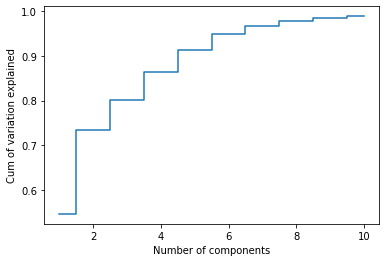

In [69]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Number of components')
plt.show()

By observing the above graph we can infer that 95% variance is being explained by only 6 principal components so we'll use that only.

In [70]:
pca = PCA(n_components=6)
pca.fit(X)
components = pca.components_

In [71]:
# Transforming data to these components.
Xpca = pca.transform(X)

## <font style = "color:rgb(184,134,11)">Step G :- SVM and K-fold CV.</font>


In [72]:
X_train, X_test, y_train, y_test = train_test_split(Xpca,y,test_size=0.3,random_state=random_state)

Now let's train the SVM model.

In [73]:
model = SVC()

In [74]:
model.fit(X_train,y_train)

SVC()

In [75]:
model.score(X_test,y_test)

0.8991935483870968

For the default values, we are getting a score of 90.32% on test set.

So now let's use hyperparameter tuning to get best parameters.

In [76]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, cv=2, n_jobs=2, return_train_score=True)

In [77]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:   14.5s finished


GridSearchCV(cv=2, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, verbose=3)

In [78]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [79]:
model = SVC(C=100,gamma=0.01,kernel="rbf")

In [80]:
model.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

In [81]:
pred = model.predict(X_test)

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        53
           1       0.95      0.90      0.92       130
           2       0.90      0.95      0.93        65

    accuracy                           0.91       248
   macro avg       0.90      0.91      0.90       248
weighted avg       0.91      0.91      0.91       248



In [83]:
model.score(X_test, y_test)

0.9112903225806451

By using SVM with principal components we're able to get around 91.13% accuracy.

Now let's perform K-Fold CV.

In [84]:
scores = cross_val_score(model,Xpca,y,cv=5)

We can infer here that were able to get an accuracy of 93% $\pm$ 4%.

## <font style = "color:rgb(184,134,11)">Step H :- Final Comparision.</font>


As we saw, without using principal components, we were only able to get an accuracy of 71.77% on test set and a K-Fold CV score of 75%, whereas, with 6 principal components, we were able to get an accuracy of 91.13% on test set and a K-Fold CV score of 93%.

This shows that PCA is very powerful at transforming data to components which can explain maximum variance (95% variance was explained by the 6 components). While this definitely shows how useful a tool PCA is, it also removes the explainability part from the components. 